Abgabe von: Mat.Nr.: 9452857 & 1113800

Aufteilung:<br>
9452857: Modell-Definition, Hyperparameter-Optimierung<br>
1113800: Netzwerkarchitektur, Loss-Funktion und Optimizer, Vergleiche

Before doing anything installing all needed dependencies

# Software requirements

Version	Python version	Compiler	Build tools	cuDNN	CUDA<br>
tensorflow-2.16.1	3.9-3.12	Clang 17.0.6	Bazel 6.5.0	8.9	12.3

!pip3 install pandas
!pip3 install scikit-learn
!pip3 install tensorflow==2.16.1
!pip3 install keras-tuner
!pip3 install matplotlib
!pip3 install imblearn

# Aufgabe 1

In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Import data

In [2]:
white_raw = pd.read_csv(os.getcwd() + "/dataset/winequality-white.csv", delimiter=";")
red_raw = pd.read_csv(os.getcwd() + "/dataset/winequality-red.csv", delimiter=";")

In [3]:
white_raw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Split wine in Test and Training Data (80% / 20%)

In [4]:
white_training_Data, white_test_data, white_training_scores, white_test_scores = (train_test_split(white_raw.drop("quality", axis=1), white_raw['quality'],test_size=0.2, random_state=39))

red_training_Data, red_test_data, red_training_scores, red_test_scores = (train_test_split(red_raw.drop("quality", axis=1), red_raw['quality'],test_size=0.2, random_state=39))

Normalize the Data
Standard Scaler to Scale around 0
MIN May to Scale this than between 0-1

Some Functionality as tensorflow Normalization Layer

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, normalize, MinMaxScaler, StandardScaler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=39)
white_training_Data, white_training_scores = ros.fit_resample(white_training_Data, white_training_scores)
red_training_Data, red_training_scores = ros.fit_resample(red_training_Data, red_training_scores)

pipeline = Pipeline([
    ('scaler1', StandardScaler()),
    ('scaler2', MinMaxScaler())
])

white_training_Data_scaled = np.array(pipeline.fit_transform(white_training_Data))
white_training_scores = np.array(white_training_scores)
white_test_data_scaled = np.array(pipeline.transform(white_test_data))
white_test_scores = np.array(white_test_scores)

red_training_Data_scaled = np.array(pipeline.fit_transform(red_training_Data))
red_training_scores = np.array(red_training_scores)
red_test_data_scaled = np.array(pipeline.transform (red_test_data))
red_test_scores = np.array(red_test_scores)


In [6]:
white_training_Data_scaled

array([[0.26923077, 0.2254902 , 0.22289157, ..., 0.47272727, 0.20238095,
        0.12903226],
       [0.375     , 0.23529412, 0.37349398, ..., 0.37272727, 0.26190476,
        0.14516129],
       [0.23076923, 0.07843137, 0.19277108, ..., 0.45454545, 0.22619048,
        0.48387097],
       ...,
       [0.50961538, 0.18627451, 0.27108434, ..., 0.43636364, 0.28571429,
        0.38709677],
       [0.31730769, 0.17647059, 0.29518072, ..., 0.59090909, 0.23809524,
        0.79032258],
       [0.26923077, 0.2745098 , 0.1746988 , ..., 0.62727273, 0.46428571,
        0.70967742]])

# Aufgabe 2
## Netzwerkarchitektur:
Die Netzwerkarchitektur basiert auf einem tiefen neuronalen Netzwerk, das mithilfe der Keras-Bibliothek implementiert wurde.

Die Architektur beginnt mit einer Eingabeschicht. Diese umfasst aufgrund der im Datensatz verwendeten 11 chemischen Eigenschaften von Wein bzw. Features eine Anzahl von 11 Neuronen. 
Aus der Eingabeschicht werden die Daten an die folgenden Schichten weitergeleitet, wo die eigentliche Verarbeitung stattfindet.

Es folgen die verdeckten Schichten, welche jeweils eine bestimmte Anzahl von Neuronen beinhalten. Jedes Neuron berechnet eine gewichtete Summe seiner Eingaben und wendet dann eine Aktivierungsfunktion auf das Ergebnis an. Es wird hier auf die ReLU-Aktivierungsfunktion zurückgegriffen, da die Regression mit einer nichtlinearen Aktivierungsfunktion durchgeführt werden sollte. ReLU zeichnet sich durch die Effizienz und die gute Gradientenverbreitung aus. 
Die Anzahl der verdeckten Schichten und die Anzahl der Neuronen in jeder Schicht sind Hyperparameter, welche mittels einer Hyperparameter-Optimierung bestimmt werden sollten.

Abschließend folgt eine Ausgabeschicht, welche eine einzige Ausgabe liefert. Diese Ausgabe repräsentiert die Vorhersage des Modells für den Weinscore basierend auf den Eingabedaten. 

# Aufgabe 3

## General Model definition

In [7]:
from math import sqrt

import keras
from keras import layers
from keras.src.models.cloning import clone_model

import tensorflow as tf

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.model_selection import KFold

import keras_tuner

In [8]:
#Check and Print Tensorflow GPU Availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def plot_loss(keras_regressor_model):
  plt.plot(keras_regressor_model.history['loss'], label='loss')
  plt.plot(keras_regressor_model.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error [Wine Quality Score]')
  plt.legend()
  plt.grid(True)
  plt.show()
  
def plot_metrics(test_scores, test_predictions):
    a = plt.axes(aspect='equal')
    plt.scatter(test_scores, test_predictions)
    plt.xlabel('True Values [winequality-white]')
    plt.ylabel('Predictions [winequality-white]')
    lims = [0, 10]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)
    plt.show()
    
    cm = confusion_matrix(test_scores, test_predictions.round(), labels=[0, 1,2,3,4,5,6,7,8,9,10])
    cm_disp = ConfusionMatrixDisplay(cm)
    cm_disp.plot()

In [10]:
def create_model_tuner(hp, learning_rate):    
    # Konfiguriere die Verteilungsstrategie
    input_layer = layers.Input(shape=(11,))
    model = keras.Sequential([
        input_layer       
    ])
    
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=2, max_value=330, step=2),
                activation='relu',
            )
        )
        model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(1))#output
    
    model.compile(loss=keras.losses.mean_squared_error,
            optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=[keras.metrics.R2Score])      
    
    return model

In [11]:
import concurrent.futures
def fit_and_evaluate_model(model: keras.Sequential, x_train, y_train, x_test, y_test, **kwargs):
    model_history = model.fit(x_train, y_train, batch_size=64, epochs=500, validation_data=(x_test, y_test), verbose=0, **kwargs)
    return model_history
    

def evaluate_model_cv(learning_rate, model, training_data, training_scores, **kwargs):
    cv_scores = []
    models_history = []
    
    kfold = KFold(n_splits=5, shuffle=True) #Cross Validation cv=5
    for i, (train_index, test_index) in enumerate(kfold.split(training_data, training_scores)):
        local_model = clone_model(model)
        #model needs recompiling after clones - recompiled with same parameters
        local_model.compile(
            loss=keras.losses.mean_squared_error, 
            optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
            metrics=[keras.metrics.R2Score])  

        model_history = fit_and_evaluate_model(local_model, training_data[train_index], training_scores[train_index], training_data[test_index], training_scores[test_index], **kwargs)
        score = model_history.history['val_r2_score'][-1]
        print(score)
        cv_scores.append(score)
        
    cv_scores = np.array(cv_scores)
    cv_score_mean = np.mean(cv_scores)    
    return cv_score_mean


def evaluate_model_cv_print(hp, training_data, training_scores, valid_data, valid_scores,  **kwargs):
    cv_scores = []
    models_history = []
    
    kfold = KFold(n_splits=5, shuffle=True) #Cross Validation cv=5
    for i, (train_index, test_index) in enumerate(kfold.split(training_data, training_scores)):
        local_model = HyperRegressor().build(hp)
        
        model_history = local_model.fit(training_data[train_index], training_scores[train_index], batch_size=64, epochs=512, validation_data=(training_data[test_index], training_scores[test_index]), verbose=0, **kwargs)
        cv_scores.append(model_history.history['val_r2_score'][-1])
        models_history.append((local_model, model_history))
        
    cv_scores = np.array(cv_scores)
        
    print('\r\nCross Validation')
    print(f'- R^2: {cv_scores}')
    print(f'- R^2 Durchschnittlicher: {np.mean(cv_scores):.4f}')
    print(f'- R^2 Standardabweichung: {np.std(cv_scores):.4f}')
    print('\r\n')
    
    #get best model
    best_model_index = np.argmax(cv_scores)   #get best r2 score model
    optimal_model = models_history[best_model_index]
    
    predicted_test_scores = optimal_model[0].predict(valid_data)
    
    r2_score_test = r2_score(valid_scores, predicted_test_scores)
    rmse_test = sqrt(mean_squared_error(valid_scores, predicted_test_scores))
    mape_test = mean_absolute_percentage_error(valid_scores, predicted_test_scores)
    
    print('Test:')
    print(f'- R^2: {r2_score_test:.4f}')
    print(f'- RMSE: {rmse_test:.2f}')
    print(f'- MAPE: {mape_test:.2%}')
    
    plot_loss(optimal_model[1])
    plot_metrics(valid_scores, predicted_test_scores)
    
    return cv_scores, optimal_model
    
        

Ablauf Hyperparameter optimierung:
Fitting 5 folds for each of x candidates totalling 5x fits
Select best model based on r2 score mean (valid)

In [12]:
class HyperRegressor(keras_tuner.HyperModel):
    def build(self, hp):
        learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
        return create_model_tuner(hp, learning_rate)

    def fit(self, hp, model, x, y, **kwargs):
        # Return a single float to maximize
        processes = []
        cv_scores = []
        
        kfold = KFold(n_splits=5, shuffle=True) #Cross Validation cv=5
        for i, (train_index, test_index) in enumerate(kfold.split(x, y)):
            local_model = self.build(hp)
            
            model_history = fit_and_evaluate_model(local_model, x[train_index], y[train_index], x[test_index], y[test_index], **kwargs)
            score = model_history.history['val_r2_score'][-1]            
            cv_scores.append(score)
            
        cv_scores = np.array(cv_scores)
        cv_score_mean = np.mean(cv_scores) 
        return cv_score_mean
    

## White Wine

In [13]:
tuner = keras_tuner.BayesianOptimization(
    hypermodel=HyperRegressor(),
    objective = keras_tuner.Objective(name="", direction='max'),
    max_trials=100,
    overwrite=False,
    directory="wine_score_training",
    project_name="white",
)

Reloading Tuner from wine_score_training/white/tuner0.json


Following cell could be disabled if values should just be loaded

In [14]:
tuner.search(
    x=white_training_Data_scaled,
    y=white_training_scores,
)

tuner.results_summary()

Results summary
Results in wine_score_training/white
Showing 10 best trials
Objective(name="", direction="max")

Trial 092 summary
Hyperparameters:
lr: 0.0012332982197502966
num_layers: 2
units_0: 220
units_1: 206
Score: 0.9653748989105224

Trial 18 summary
Hyperparameters:
lr: 0.0011664940321518
num_layers: 2
units_0: 220
units_1: 220
Score: 0.9648572564125061

Trial 072 summary
Hyperparameters:
lr: 0.0012215599200960591
num_layers: 2
units_0: 220
units_1: 198
Score: 0.9643449425697327

Trial 053 summary
Hyperparameters:
lr: 0.0011583836811043184
num_layers: 2
units_0: 220
units_1: 206
Score: 0.9642662286758423

Trial 49 summary
Hyperparameters:
lr: 0.0013140019210284941
num_layers: 2
units_0: 220
units_1: 190
Score: 0.9642589569091797

Trial 17 summary
Hyperparameters:
lr: 0.0012659952144362654
num_layers: 2
units_0: 220
units_1: 202
Score: 0.9640674471855164

Trial 090 summary
Hyperparameters:
lr: 0.0012370253610342911
num_layers: 2
units_0: 220
units_1: 202
Score: 0.964058732986450

Note: the Input layer is there implicitly, but it is not considered a layer proper and it does not show up in model.summary()

In [15]:
best_model = tuner.get_best_models()[0]
best_model.summary()

/Users/paulbrenner/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 220)            │         2,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 220)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 206)            │        45,526 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 206)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           207 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,373 (188.96 KB)

 Trainable params: 48,373 (188.96 KB)

 Non-trainable params: 0 (0.00 B)


Cross Validation
- R^2: [0.96046251 0.96224058 0.96451825 0.96726704 0.96159637]
- R^2 Durchschnittlicher: 0.9632
- R^2 Standardabweichung: 0.0024


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step
Test:
- R^2: 0.3183
- RMSE: 0.75
- MAPE: 9.60%


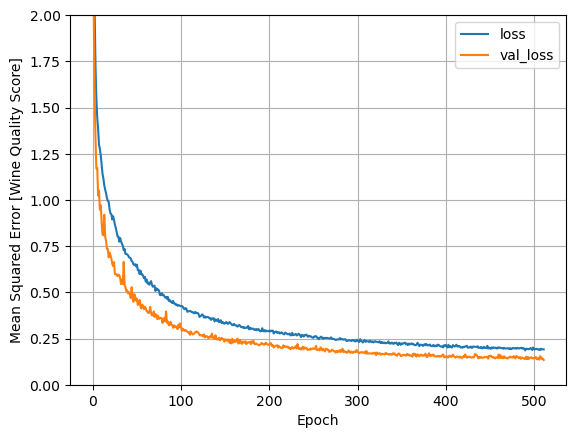

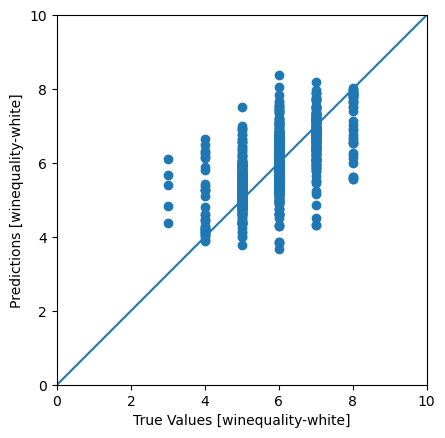

CPU times: user 9min 45s, sys: 1min 33s, total: 11min 18s
Wall time: 7min 53s


(array([0.96046251, 0.96224058, 0.96451825, 0.96726704, 0.96159637]),
 (<Sequential name=sequential_4, built=True>,
  <keras.src.callbacks.history.History at 0x3294b7150>))

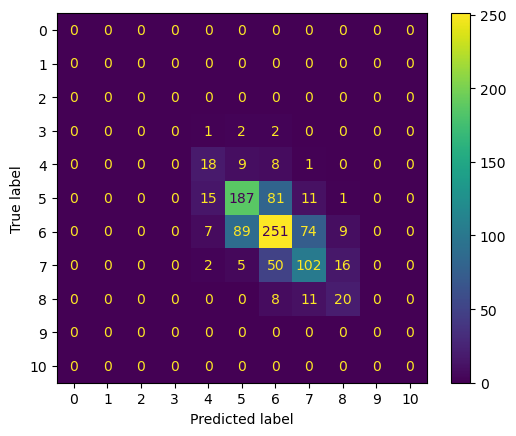

In [16]:
%%time
#Retrain best Model
best_hp = tuner.get_best_hyperparameters()[0]
best_model_history = evaluate_model_cv_print(best_hp, white_training_Data_scaled, white_training_scores, white_test_data_scaled, white_test_scores)
best_model_history

In [17]:
best_hp.values

{'lr': 0.0012332982197502966, 'num_layers': 2, 'units_0': 220, 'units_1': 206}

## RED Wine

In [18]:
red_tuner = keras_tuner.BayesianOptimization(
    hypermodel=HyperRegressor(),
    objective = keras_tuner.Objective(name="", direction='max'),
    max_trials=85,
    overwrite=False,
    directory="wine_score_training",
    project_name="red",
)

Reloading Tuner from wine_score_training/red/tuner0.json


In [19]:
red_tuner.search(
    x=red_training_Data_scaled,
    y=red_training_scores,
)

red_tuner.results_summary()

Results summary
Results in wine_score_training/red
Showing 10 best trials
Objective(name="", direction="max")

Trial 50 summary
Hyperparameters:
lr: 0.0017062317635702748
num_layers: 2
units_0: 158
units_1: 220
Score: 0.9500704526901245

Trial 64 summary
Hyperparameters:
lr: 0.0017259004301463411
num_layers: 2
units_0: 158
units_1: 220
Score: 0.949598515033722

Trial 33 summary
Hyperparameters:
lr: 0.0018243901560444126
num_layers: 2
units_0: 144
units_1: 168
Score: 0.9494137525558471

Trial 53 summary
Hyperparameters:
lr: 0.0031383175335364445
num_layers: 2
units_0: 186
units_1: 120
Score: 0.9489416718482971

Trial 31 summary
Hyperparameters:
lr: 0.0017178158788675895
num_layers: 2
units_0: 146
units_1: 174
Score: 0.9488247871398926

Trial 46 summary
Hyperparameters:
lr: 0.0016562356416230438
num_layers: 2
units_0: 166
units_1: 220
Score: 0.9487973213195801

Trial 39 summary
Hyperparameters:
lr: 0.0014408426585621583
num_layers: 2
units_0: 180
units_1: 220
Score: 0.948509418964386

Tr

In [20]:
best_red_model = red_tuner.get_best_models()[0]
best_red_model.summary()

/Users/paulbrenner/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 158)            │         1,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 158)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 220)            │        34,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 220)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           221 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,097 (144.91 KB)

 Trainable params: 37,097 (144.91 KB)

 Non-trainable params: 0 (0.00 B)


Cross Validation
- R^2: [0.95604324 0.94921893 0.94770503 0.94272274 0.95272017]
- R^2 Durchschnittlicher: 0.9497
- R^2 Standardabweichung: 0.0045


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
Test:
- R^2: 0.4133
- RMSE: 0.66
- MAPE: 9.28%


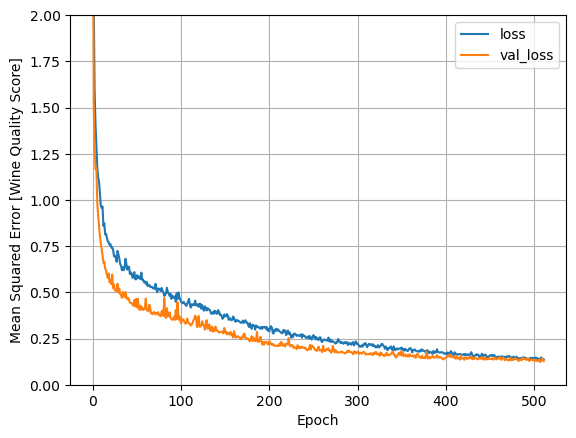

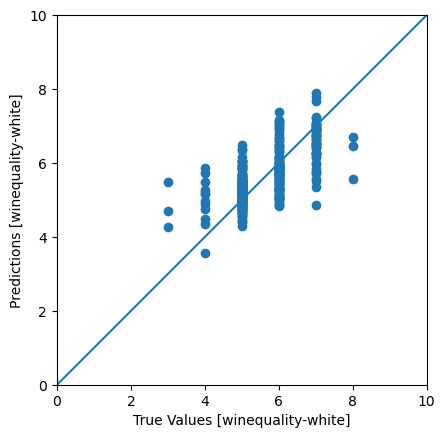

CPU times: user 3min 23s, sys: 30 s, total: 3min 53s
Wall time: 2min 55s


(array([0.95604324, 0.94921893, 0.94770503, 0.94272274, 0.95272017]),
 (<Sequential name=sequential_1, built=True>,
  <keras.src.callbacks.history.History at 0x31ece7190>))

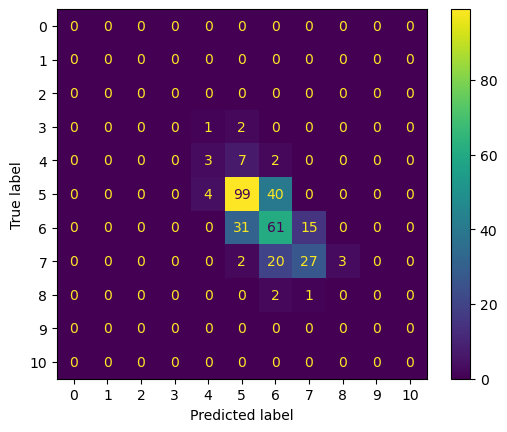

In [21]:
%%time
#Retrain best Model
best_red_hp = red_tuner.get_best_hyperparameters()[0]
best_red_model_history = evaluate_model_cv_print(best_hp, red_training_Data_scaled, red_training_scores, red_test_data_scaled, red_test_scores)
best_red_model_history

In [22]:
best_red_hp.values

{'lr': 0.0017062317635702748, 'num_layers': 2, 'units_0': 158, 'units_1': 220}

# Aufgabe 4
## Loss-Fkt und Optimizer:
Auf Basis der Aufgabenstellung wurden die Mean Squared Error (MSE) Loss-Funktion und der Adam-Optimizer ausgewählt.

Die MSE Loss-Funktion ist eine häufig verwendete Loss-Funktion, da sie die Genauigkeit der Vorhersagen quantifiziert und das Modell dadurch anregt, möglichst nahe an den tatsächlichen Werten zu liegen. 

Der Adam-Optimierer ist einer der beliebtesten Optimierer und bietet eine adaptive Lernrate. Er überzeugt durch seine Effizienz und minimale Speicheranforderungen und ist auch für Probleme mit großen Datensets gut geeignet. Durch die adaptive Skalierung seiner Lernraten eignet sich Adam gut für Modelle mit verrauschten Daten.

Einer der wichtigsten Hyperparameter für die Nutzung des Adam-Optimizers ist die Learning-Rate, welche mittels Hyperparameter-Optimierung bestimmt wird.


# Aufgabe 5
## Vergleich Roter und Weißer Wein
Für den weißen Wein ergab die Cross-Validation einen durchschnittlichen R2-Score von 0,9632 mit einer geringen Standardabweichung von 0,0024. Dies deutet darauf hin, dass das Modell konsistente und präzise Vorhersagen für verschiedene Teilmengen der Daten liefert. 

Der R2-Score des Testsets lässt jedoch mit seinem niedrigen Wert von 0,3183 darauf schließen, dass das Modell Schwierigkeiten hatte auf unbekannten Daten zu schließen. 

Für den roten Wein ergab die Cross-Validation aufgrund des kleineren Datensets einen etwas niedrigeren R2-Wert von 0,9497 und eine etwas höhere Standardabweichung (0,0045 vs 0,0024). 

Auf den Testdaten wurde hier jedoch ein R2-Score von 0.4133 erzielt, was gegenüber dem weißen Datenset mit 0.3183 eine bessere Vorhersagegenauigkeit bedeutet.

Zusammenfassend wurde hier also trotz des kleineren Datensets eine bessere Genauigkeit für die Vorhersage des roten Weins erzielt, obwohl der weiße Wein bei der Cross-Validation eine höhere Genauigkeit aufwies.

## Vergleich klassischer Ansatz vs Deep Learning
Der klassische Ansatz lässt sich im Vergleich zum Deep Learning schneller implementieren.
Des weiteren sticht Deep Learning durch deutlich längere Trainingszeiten (1 Minute klassisch vs. 10 Minuten Deep Learning) heraus. 

Im Vergleich der Scores auf den Testdaten liefert der klassische Ansatz auf dem größeren Datensatz (weißer Wein) einen besseren R2-Score (0.4862 klassich, 0.3183 Deep Learning). 
Bei einem kleineren Datenset (roter Wein) liefern beide Ansätze eine nahezu identische Performance (0,3914 klassisch, 0,4133 Deep Learning).
